In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

### 1. Wczytuje dane

In [2]:
train_df=pd.read_csv("D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_train.csv", encoding="utf-8")
test_df=pd.read_csv("D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_test.csv", encoding="utf-8")
val_df=pd.read_csv("D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_val.csv", encoding="utf-8")

train_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
test_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
val_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']


caly_df = pd.concat([train_df, test_df, val_df])


caly_label=caly_df["OMC"]

del caly_df["OMC"]
del caly_df["IE"]
del caly_df["id"]
del caly_df["PF"]
del caly_df["Dokł. IE"]

In [3]:
len(caly_label)

1881

In [4]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 188
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Województwo     1881 non-null   object 
 1   Data urodzenia  1881 non-null   int64  
 2   PI-PROD         1881 non-null   int64  
 3   PI-POKR         1881 non-null   int64  
 4   Prc             1881 non-null   int64  
 5   Psm             1881 non-null   int64  
 6   Pnr             1881 non-null   int64  
 7   Pw              1881 non-null   int64  
 8   PI-PLOD         1881 non-null   int64  
 9   CRj             1881 non-null   int64  
 10  CRk             1881 non-null   int64  
 11  PP              1881 non-null   int64  
 12  WH-KSOM         1881 non-null   int64  
 13  WH-DLUG         1881 non-null   int64  
 14  IP              1881 non-null   int64  
 15  kg ml           1881 non-null   int64  
 16  kg tł           1881 non-null   int64  
 17  % tł            1881 non-null   in

### 2. Usuwam zmienne kategoryczne

In [5]:
del caly_df["kategoria"]
del caly_df["Data urodzenia"]
del caly_df["Województwo"]

In [6]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 188
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PI-PROD  1881 non-null   int64  
 1   PI-POKR  1881 non-null   int64  
 2   Prc      1881 non-null   int64  
 3   Psm      1881 non-null   int64  
 4   Pnr      1881 non-null   int64  
 5   Pw       1881 non-null   int64  
 6   PI-PLOD  1881 non-null   int64  
 7   CRj      1881 non-null   int64  
 8   CRk      1881 non-null   int64  
 9   PP       1881 non-null   int64  
 10  WH-KSOM  1881 non-null   int64  
 11  WH-DLUG  1881 non-null   int64  
 12  IP       1881 non-null   int64  
 13  kg ml    1881 non-null   int64  
 14  kg tł    1881 non-null   int64  
 15  % tł     1881 non-null   int64  
 16  kg bi    1881 non-null   int64  
 17  % bi     1881 non-null   int64  
 18  rc       1881 non-null   float64
 19  sm       1881 non-null   float64
 20  nr       1881 non-null   float64
 21  w        1881 n

In [7]:
nazwy_kolumn=caly_df.columns

### 3. Wybieram najlepsze zmienne według REFCV na regresji liniowej

In [8]:
mae_scorer = make_scorer(mean_absolute_error)

In [9]:
estimator=LinearRegression()
selector = RFECV(estimator, step=1, cv=5,scoring=mae_scorer)
scaler = StandardScaler()
data_frame = scaler.fit_transform(caly_df)
selector2 = selector.fit(data_frame, caly_label)


In [10]:
selector2.ranking_

array([10, 15, 18, 14, 16, 17,  4,  5, 11,  6, 21, 23,  1,  7,  3,  8,  2,
        9, 22, 20, 19, 12, 13])

In [11]:
dictionary = dict(zip(nazwy_kolumn, selector2.ranking_))
dictionary= dict(sorted(dictionary.items(), key=lambda item: item[1]))

In [12]:
dictionary

{'IP': 1,
 'kg bi': 2,
 'kg tł': 3,
 'PI-PLOD': 4,
 'CRj': 5,
 'PP': 6,
 'kg ml': 7,
 '% tł': 8,
 '% bi': 9,
 'PI-PROD': 10,
 'CRk': 11,
 'w': 12,
 'og': 13,
 'Psm': 14,
 'PI-POKR': 15,
 'Pnr': 16,
 'Pw': 17,
 'Prc': 18,
 'nr': 19,
 'sm': 20,
 'WH-KSOM': 21,
 'rc': 22,
 'WH-DLUG': 23}

In [13]:
nazwy_kolumn_2=[]
for x in dictionary.keys():
    nazwy_kolumn_2.append(x)

In [14]:
caly_df_zapas=caly_df

In [15]:
nazwy_kolumn_2

['IP',
 'kg bi',
 'kg tł',
 'PI-PLOD',
 'CRj',
 'PP',
 'kg ml',
 '% tł',
 '% bi',
 'PI-PROD',
 'CRk',
 'w',
 'og',
 'Psm',
 'PI-POKR',
 'Pnr',
 'Pw',
 'Prc',
 'nr',
 'sm',
 'WH-KSOM',
 'rc',
 'WH-DLUG']

In [16]:
dane_do_porownania=pd.DataFrame(columns=["Liczba zmiennych",
                                    "Błąd"])
kombinacje=[]
glowne_wyniki=[]
glowne_zmienne=[]
for i in range(0,len(nazwy_kolumn_2)):
    zmienne=[]
    for q in range(0,i+1):
        zmienne.append(nazwy_kolumn_2[q])
    kombinacje.append(zmienne)
    data_frame=caly_df_zapas[zmienne]
    kfold = KFold(n_splits=5, shuffle=False)
    
    scaler = StandardScaler()
    data_frame = scaler.fit_transform(data_frame)
    
    data_frame = np.array(data_frame)
    caly_label = np.array(caly_label)
    
    wyniki=[]
    
    for train, test in kfold.split(data_frame, caly_label):
        reg = KNeighborsRegressor()
        reg.fit(data_frame[train], caly_label[train])
        predykcje=reg.predict(data_frame[test])
        
        dane_folda=pd.DataFrame({"pred": predykcje.ravel(),
                                    "obs": caly_label[test]
                                })
        
        dane_folda['blad']=abs(dane_folda['obs']-dane_folda['pred'])
        mae=dane_folda['blad'].sum()/len(dane_folda['blad'])
        wyniki.append(mae)
        
    wynik=sum(wyniki)/len(wyniki)
    glowne_wyniki.append(wynik)
    glowne_zmienne.append(i)

                       

In [17]:
dane_do_porownania["Liczba zmiennych"]=glowne_zmienne
dane_do_porownania["Błąd"]=glowne_wyniki

In [18]:
list(dane_do_porownania["Błąd"])

[5.037822111857329,
 5.069973756984028,
 5.185551949884305,
 4.324889666459732,
 3.605900728032057,
 2.201830520909758,
 2.2273407077148826,
 2.274521135504261,
 2.3496754895874483,
 2.4179502229245444,
 2.110518087928213,
 2.1715926406682096,
 2.302607934985045,
 2.4175379536091204,
 2.4469148936170213,
 2.5317348608837973,
 2.5755172413793104,
 2.594657429877533,
 2.638095264969807,
 2.6367963767706986,
 2.690241830803093,
 2.783290535583273,
 2.7491751791861843]

In [19]:
list(dane_do_porownania["Błąd"]).index(min(list(dane_do_porownania["Błąd"])))

10

In [20]:
min(list(dane_do_porownania["Błąd"]))

2.110518087928213

In [21]:
dane_do_porownania["Błąd"][10]

2.110518087928213

In [22]:
len(dane_do_porownania["Błąd"])

23

In [22]:
dane_do_porownania.to_csv('Wyniki REFCV KNN OMC.csv',index=False)

In [23]:
kombinacje[10]

['IP',
 'kg bi',
 'kg tł',
 'PI-PLOD',
 'CRj',
 'PP',
 'kg ml',
 '% tł',
 '% bi',
 'PI-PROD',
 'CRk']

In [24]:
len(kombinacje[10])

11

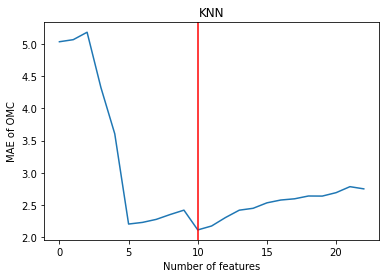

In [25]:
plt.plot(list(dane_do_porownania["Błąd"]))
plt.axvline(x=list(dane_do_porownania["Błąd"]).index(min(list(dane_do_porownania["Błąd"]))), color='r', linestyle='-')
plt.xlabel("Number of features")
plt.ylabel("MAE of OMC")
plt.title("KNN")
plt.show()

10 zmiennych włącznie daje najmniejszy bład

In [29]:
zestaw_caly=caly_df_zapas
zestaw_10=caly_df_zapas[kombinacje[10]]


### 4. Wyszukuje hiper-parametry

In [30]:
scaler = StandardScaler()

In [31]:

zestaw_caly = scaler.fit_transform(zestaw_caly)
zestaw_10= scaler.fit_transform(zestaw_10)

zestaw_caly = np.array(zestaw_caly)
zestaw_10 = np.array(zestaw_10)

caly_label = np.array(caly_label)


#### 4.1 Wszystkie dane

In [32]:
param_grid = {
    'n_neighbors':range(1,30,3),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(1,30,3),
    'p': [1,2],
}


In [33]:
knn_1 = KNeighborsRegressor()
grid_search_1 = GridSearchCV(estimator = knn_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1,scoring='neg_mean_absolute_error')
grid_search_1.fit(zestaw_caly, np.ravel(caly_label))

Fitting 2 folds for each of 1600 candidates, totalling 3200 fits


GridSearchCV(cv=2, estimator=KNeighborsRegressor(), n_jobs=1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(1, 30, 3),
                         'n_neighbors': range(1, 30, 3), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error', verbose=1)

In [34]:
grid_search_1.best_estimator_

KNeighborsRegressor(algorithm='ball_tree', leaf_size=1, n_neighbors=16,
                    weights='distance')

In [35]:
grid_search_1.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 16,
 'p': 2,
 'weights': 'distance'}

#### 4.2 Zestaw 10 zmiennych

In [36]:
knn_2 = KNeighborsRegressor()
grid_search_2 = GridSearchCV(estimator = knn_2, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1,scoring='neg_mean_absolute_error')
grid_search_2.fit(zestaw_10, np.ravel(caly_label))

Fitting 2 folds for each of 1600 candidates, totalling 3200 fits


GridSearchCV(cv=2, estimator=KNeighborsRegressor(), n_jobs=1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(1, 30, 3),
                         'n_neighbors': range(1, 30, 3), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error', verbose=1)

In [37]:
grid_search_2.best_estimator_

KNeighborsRegressor(leaf_size=1, n_neighbors=10, weights='distance')

In [38]:
grid_search_2.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'distance'}

### 5. Przeprowadzam 5 krotną cross-validację

#### 5.1 Wszystkie dane

In [39]:
kfold = KFold(n_splits=5, shuffle=False)
dane_do_zapisu_2=pd.DataFrame()
licznik=1
wart_2=[]
for train, test in kfold.split(zestaw_caly, caly_label):
    reg = KNeighborsRegressor(algorithm='ball_tree', leaf_size=1, n_neighbors=16,
                    weights='distance')
    reg.fit(zestaw_caly[train], caly_label[train])
    predykcje=reg.predict(zestaw_caly[test])
    dane_folda_2=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_2=pd.concat([dane_do_zapisu_2,dane_folda_2])
    sredni_blad=mean_absolute_error(caly_label[test],predykcje) #y tre, y pred
    wart_2.append(sredni_blad)
    licznik+=1

In [40]:
wart_2

[1.9685522052424687,
 1.8202980420758421,
 1.7590090871253488,
 1.7030452039495,
 1.787113128603223]

In [41]:
sum(wart_2)/len(wart_2)

1.8076035333992764

#### 5.2 Zestaw 10

In [42]:
kfold = KFold(n_splits=5, shuffle=False)
dane_do_zapisu_1=pd.DataFrame()
licznik=1
wart_1=[]
for train, test in kfold.split(zestaw_10, caly_label):
    reg = KNeighborsRegressor(leaf_size=1, n_neighbors=10, weights='distance')
    reg.fit(zestaw_10[train], caly_label[train])
    predykcje=reg.predict(zestaw_10[test])
    dane_folda_1=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_1=pd.concat([dane_do_zapisu_1,dane_folda_1])
    sredni_blad=mean_absolute_error(caly_label[test],predykcje)
    wart_1.append(sredni_blad)
    licznik+=1

In [43]:
wart_1

[1.4376992582452244,
 1.3435856390402257,
 1.2605396394041668,
 1.3055495928823313,
 1.2285693234837411]

In [44]:
sum(wart_1)/len(wart_1)

1.3151886906111379

Feature Selection pozwolił na zmniejszenie błedu z 1.81 na 1.31 

zmienne:


In [45]:
kombinacje[10]

['IP',
 'kg bi',
 'kg tł',
 'PI-PLOD',
 'CRj',
 'PP',
 'kg ml',
 '% tł',
 '% bi',
 'PI-PROD',
 'CRk']

In [46]:
dane_do_zapisu_1.head()

,pred,obs,Fold
0,105.000000,105,1
1,103.721587,98,1
2,105.394384,100,1
3,100.000000,100,1
4,110.330652,113,1


In [47]:
#dane_do_zapisu_1.to_csv("D:/STUDIA/ROK_II/Projekt/Predykcje_i błędy/Okres Między Ciążowy/OMC_KNN_FS.csv")